In this notebook I will pass to clean the Analysis4.1 script.

In [1]:
import os
import fnmatch
from os.path import isfile, join

import pandas as pd
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"

# Integrating areas

In this notebook, I will integrate the area under the type 3 vertex population curve for the rising window and the decreasing one, then I will perform the substraction of both. I will perform this process for all the mT/s rates computed and all the runs. So, the objective of this notebook is to have A_{rising}-A_{decresing} vs increasing(decreasing) mT/s rate.

### 1. Importing the data

First, I will import the dataframes of the vertex fraction for all the rates values. In order to build a unique dataframe. 

In [3]:
Data_path = "/home/carolina/Dropbox/BidisperseColloidalIce_PROJECT/data_Chi_vs_rate"

In [4]:
inc = []
dec = []

for file in os.listdir(Data_path):
    if fnmatch.fnmatch(file, 'Bajada_sep*.dat'):
        print(file)
        dec.append(pd.read_csv(join(Data_path,file), sep = "\t", index_col = [0,1])) 
    if fnmatch.fnmatch(file, 'Subida_sep*.dat'):
        #print(file)
        inc.append(pd.read_csv(join(Data_path,file), sep = "\t", index_col = [0,1])) 
field_max = 200
keys_d = [2900,4000,2000,8169,220,250,500,3362,280,5800,10265,330,20000,400,200,650,970]
keys_s = [500,10265,650,20000,4000,2900,250,200,280,970,8169,5800,220,3362,330,400,2000]

Bajada_sep2900.dat
Bajada_sep4000.dat
Bajada_sep2000.dat
Bajada_sep8169.dat
Bajada_sep220.dat
Bajada_sep250.dat
Bajada_sep500.dat
Bajada_sep3362.dat
Bajada_sep280.dat
Bajada_sep5800.dat
Bajada_sep10265.dat
Bajada_sep330.dat
Bajada_sep20000.dat
Bajada_sep400.dat
Bajada_sep200.dat
Bajada_sep650.dat
Bajada_sep970.dat


In [5]:
keys_d[:] = [round(field_max/x,6) for x in keys_d]
keys_s[:] = [round(field_max/x,6) for x in keys_s]

In [6]:
inc = pd.concat(inc, keys = keys_s)
dec = pd.concat(dec, keys = keys_d)

In [7]:
dec.index.names = ['rate', 'exp', 'frame']
inc.index.names = ['rate', 'exp', 'frame']

### 2. Computing the area under the type 3 population curves

Now, I will compute the area under the type 3 population curves for all the experiments and rates values. I will use the trapezoidal method. 

In [8]:
def trpz_integral(dataframe):
    
    """ 
    input: dataframe with the vertex fraction information of each experiment and rate
    output: dataframe with the integrated area under the data for each rate and experiment
    """
    
    int_res = []
    rate = []
    exp = []
    df = dataframe.groupby(['rate', 'exp'])
    
    for i, (n,gr) in enumerate(df):
#        int_res.append(integrate.trapz(gr['fraction'],gr.index.get_level_values('frame')))
        int_res.append(integrate.trapz(gr['fraction'], dx = 1))

        rate.append(n[0])
        exp.append(n[1])
        
    d = {'area': int_res, 'rate': rate, 'exp': exp}

    df = pd.DataFrame(data=d)
    
    df = df.set_index(['rate','exp'])
        
    return df

In [9]:
def mean_and_err(dataframe):
    
    """
    After the correction
    """
    df = dataframe.groupby('rate')['area'].mean()
    
    df = df.to_frame()
    df = df/dataframe.groupby(['rate']).count()
    
    df['err'] = dataframe.groupby('rate')['area'].std().to_frame()/np.sqrt(dataframe.groupby('rate').count())
    
    return df 

In [10]:
df_inc = trpz_integral(inc)
df_dec = trpz_integral(dec)

In [11]:
i = mean_and_err(df_inc)
d = mean_and_err(df_dec)

In [12]:
d

,area,err
rate,,
0.010000,73.639455,6.908550
0.019484,29.964925,3.569112
0.024483,23.277613,2.235786
0.034483,16.128037,1.784277
0.050000,10.518525,1.399143
0.059488,8.748188,0.841475
0.068966,9.102521,0.705673
0.100000,4.740150,0.601502
0.206186,1.991988,0.217017


In [13]:
i

,area,err
rate,,
0.010000,53.249126,3.862773
0.019484,21.106613,1.949937
0.024483,16.712687,1.197194
0.034483,11.512038,0.879595
0.050000,7.907275,0.827003
0.059488,6.547912,0.534935
0.068966,7.130796,0.597013
0.100000,3.829663,0.550107
0.206186,1.836712,0.109078


In [14]:
a = (d['area'])-(i['area'])
b = (i['area'])-(d['area'])

In [15]:
a = a.to_frame()
b = b.to_frame()

In [16]:
a['err'] = np.sqrt((i['err'])**2+(d['err'])**2)
b['err'] = np.sqrt((i['err'])**2+(d['err'])**2)

In [17]:
a

,area,err
rate,,
0.010000,20.390329,7.915117
0.019484,8.858313,4.067040
0.024483,6.564925,2.536141
0.034483,4.616000,1.989304
0.050000,2.611250,1.625280
0.059488,2.200275,0.997113
0.068966,1.971725,0.924337
0.100000,0.910488,0.815121
0.206186,0.155275,0.242887


### 3. Plotting the resulting data 

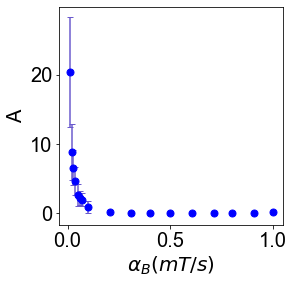

In [32]:
plt.figure(figsize = (4,4))
plt.errorbar(a.index.get_level_values('rate'), a['area'],yerr = a['err'],capsize = 3, ecolor = 'slateblue', fmt= 'o', markersize = 7, color = 'blue')

plt.xlabel(r'$ \alpha_{B} (mT/s)$', size = 20)
plt.ylabel('A', size = 20)

plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)

plt.savefig('A_vs_rate.png', bbox_inches='tight')

a.to_csv('data_Fig4b.dat', sep = '\t')

In [18]:
a['log A'] = np.log(a['area'])
a['log err'] = a['err']*0.434/a['area']
a['log rate'] = np.log(a.index.get_level_values('rate'))
a

/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,area,err,log A,log err,log rate
rate,,,,,
0.010000,20.390329,7.915117,3.015061,0.168470,-4.605170
0.019484,8.858313,4.067040,2.181356,0.199259,-3.938162
0.024483,6.564925,2.536141,1.881741,0.167662,-3.709776
0.034483,4.616000,1.989304,1.529529,0.187036,-3.367289
0.050000,2.611250,1.625280,0.959829,0.270128,-2.995732
0.059488,2.200275,0.997113,0.788582,0.196679,-2.821981
0.068966,1.971725,0.924337,0.678909,0.203457,-2.674142
0.100000,0.910488,0.815121,-0.093775,0.388542,-2.302585
0.206186,0.155275,0.242887,-1.862558,0.678880,-1.578977


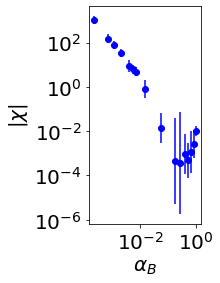

In [21]:
@plt.FuncFormatter
def fake_log(x, pos):
    'The two args are the value and tick position'
    return r'$10^{%d}$' % (x)

 

fig, (ax1) = plt.subplots()
ax1.errorbar(a['log rate'],a['log A'], yerr = a['log err'] ,fmt ='o', color = 'blue')

ax1.xaxis.set_major_formatter(fake_log)
ax1.yaxis.set_major_formatter(fake_log)
ax1.set_xlabel(r'$ \alpha_{B} $', size = 20)
ax1.set_ylabel('$|\chi|$', size = 20)


ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
plt.gca().set_aspect('equal', adjustable='box')

### 4. Fitting data in LogLog

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
a_fit = a.loc[a.index.get_level_values('rate') < 0.1]
a_fit['log rate'] = np.log(a_fit.index.get_level_values('rate'))
a_fit['log A'] = np.log(a_fit['area'])
a_fit['log err'] = np.log(a_fit['err'])

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [21]:
x = a_fit['log rate'].values.reshape((-1, 1))
y = a_fit['log A'].values
model = LinearRegression()

In [22]:
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.9976877448139146
intercept: -2.6684483370864234
slope: [-1.23232561]


In [23]:
a_fit

,area,err,log A,log err,log rate
rate,,,,,
0.010000,20.390329,7.915117,3.015061,2.068774,-4.605170
0.019484,8.858313,4.067040,2.181356,1.402915,-3.938162
0.024483,6.564925,2.536141,1.881741,0.930644,-3.709776
0.034483,4.616000,1.989304,1.529529,0.687785,-3.367289
0.050000,2.611250,1.625280,0.959829,0.485680,-2.995732
0.059488,2.200275,0.997113,0.788582,-0.002891,-2.821981
0.068966,1.971725,0.924337,0.678909,-0.078679,-2.674142


In [24]:
a['y'] = -1.23232561*a['log rate']

In [25]:
a

,area,err,log A,log err,log rate,y
rate,,,,,,
0.010000,20.390329,7.915117,3.015061,0.168470,-4.605170,5.675069
0.019484,8.858313,4.067040,2.181356,0.199259,-3.938162,4.853097
0.024483,6.564925,2.536141,1.881741,0.167662,-3.709776,4.571652
0.034483,4.616000,1.989304,1.529529,0.187036,-3.367289,4.149596
0.050000,2.611250,1.625280,0.959829,0.270128,-2.995732,3.691718
0.059488,2.200275,0.997113,0.788582,0.196679,-2.821981,3.477599
0.068966,1.971725,0.924337,0.678909,0.203457,-2.674142,3.295413
0.100000,0.910488,0.815121,-0.093775,0.388542,-2.302585,2.837535
0.206186,0.155275,0.242887,-1.862558,0.678880,-1.578977,1.945813


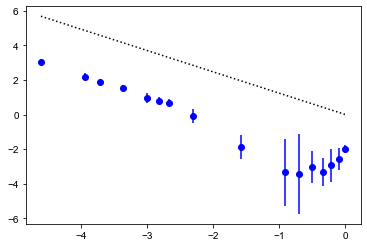

In [29]:
plt.errorbar(a['log rate'],a['log A'], yerr = a['log err'] ,fmt ='o', color = 'blue')

# < Adding the fit >

plt.plot(a['log rate'],a['y'] ,':', color = 'black')

In [28]:
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"

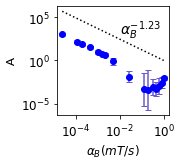

In [29]:
@plt.FuncFormatter
def fake_log(x, pos):
    'The two args are the value and tick position'
    return r'$10^{%d}$' % (x)

fig, (ax1) = plt.subplots(figsize = (2,2))

ax1.errorbar(a['log rate'],a['log A'], yerr = a['log err'] ,capsize = 3, ecolor = 'slateblue', fmt ='o', color = 'blue')

# < Adding the fit >

ax1.plot(a['log rate'],a['y'] ,':', color = 'black')

ax1.xaxis.set_major_formatter(fake_log)
ax1.yaxis.set_major_formatter(fake_log)
ax1.set_xlabel(r'$ \alpha_{B} (mT/s)$', size = 12)
ax1.set_ylabel('A', size = 12)

ax1.text(-2, 3, r'$ \alpha_{B}^{-1.23} $', fontsize=14)

ax1.tick_params(axis='y', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

#plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('inset.png', bbox_inches='tight')